In [2]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt


dia = load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


x=dia.data
y=dia.target

In [4]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=3)
ridge_reg=Ridge(alpha=2)

reg.fit(x,y)
lasso_reg.fit(x,y)
ridge_reg.fit(x,y)

Ridge(alpha=2)

In [5]:
for a, b in zip(dia.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

age: -10.012198
sex: -239.819089
bmi: 519.839787
bp: 324.390428
s1: -792.184162
s2: 476.745838
s3: 101.044570
s4: 177.064176
s5: 751.279321
s6: 67.625386


In [6]:
for a, b in zip(dia.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

age: 0.000000
sex: 0.000000
bmi: 0.000000
bp: 0.000000
s1: 0.000000
s2: 0.000000
s3: -0.000000
s4: 0.000000
s5: 0.000000
s6: 0.000000


In [7]:
for a, b in zip(dia.feature_names, ridge_reg.coef_):
    print("%s: %f" %(a,b))

age: 33.684368
sex: -41.040187
bmi: 223.029964
bp: 152.203371
s1: 20.941211
s2: -2.749722
s3: -121.063689
s4: 103.717329
s5: 195.099906
s6: 99.467716


In [8]:
reg.score(x,y)

0.5177494254132934

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30 , random_state=7)

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)

In [13]:
from sklearn import metrics
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.007518796992481203
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


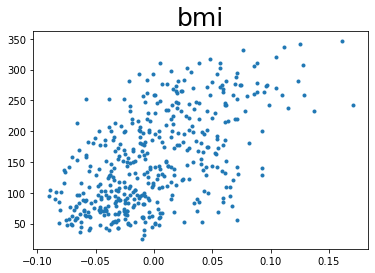

In [14]:
X=[i[2] for i in x]
plt.title('bmi',size=25)
plt.plot(X,y,'.')

In [15]:
model_linear = LinearRegression().fit(dia.data[:,2].reshape(-1,1),dia.target)

Text(0.5, 1.0, 'bmi')

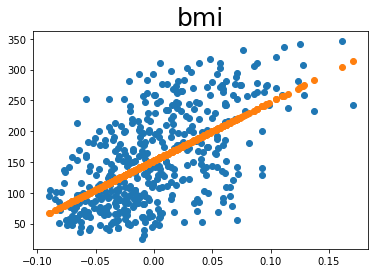

In [16]:
plt.scatter(dia.data[:,2],dia.target)
plt.scatter(dia.data[:,2],model_linear.predict(dia.data[:,2].reshape(-1,1)))
plt.title('bmi',size=25)

Text(0.5, 1.0, 'bmi')

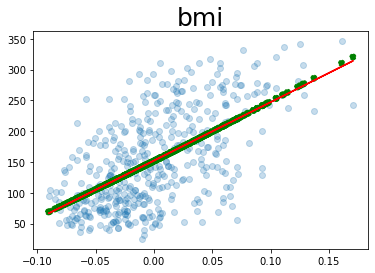

In [17]:
poly_2 = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(dia.data[:,2].reshape(-1,1))
 
model_2_poly = LinearRegression().fit(poly_2_X,dia.target)
plt.scatter(dia.data[:,2],dia.target,alpha=0.25)
 
linear_fit = plt.plot(dia.data[:,2], model_linear.predict(dia.data[:,2].reshape(-1,1)), color = 'red',linestyle='-')
poly_2_fit = plt.scatter(dia.data[:,2], model_2_poly.predict(poly_2_X), color = 'green', linestyle='--')
plt.title('bmi',size=25)